In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#uploading the training dataset
acc_train = pd.read_csv("/content/drive/MyDrive/final_project/train.csv")
acc_train.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Direction,Wind_Speed.mph.,Precipitation.in.,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2017855,MapQuest,201.0,2,2018-07-19 20:30:23,2018-07-19 21:14:11,34.153896,-118.275482,NaN,NaN,0.000,Lane blocked due to accident on CA-134 Eastbou...,5563.0,San Fernando Rd,L,Glendale,Los Angeles,CA,91203,US,US/Pacific,KBUR,2018-07-19 20:53:00,75.0,NaN,66.0,29.90,10.0,South,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
1,A-3340193,Bing,NaN,2,2020-12-27 13:22:48,2020-12-27 15:02:42,40.261747,-75.250020,40.263001,-75.251072,0.103,Incident on BETHLEHEM PIKE near MELE AVE Drive...,591.0,Bethlehem Pike,R,Montgomeryville,Montgomery,PA,18936-9703,US,US/Eastern,KLOM,2020-12-27 13:15:00,36.0,31.0,53.0,29.97,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3274372,Bing,NaN,2,2020-12-19 20:27:52,2020-12-19 22:23:39,29.980875,-90.073829,29.981676,-90.073111,0.070,Incident on N BROAD ST near AUBRY ST Drive wit...,NaN,Dabadie St,R,New Orleans,Orleans,LA,70119,US,US/Pacific,KAUD,2020-12-19 20:34:00,57.0,57.0,100.0,30.06,4.0,ENE,12.0,0.2,Heavy Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-2782559,Bing,NaN,3,2016-09-27 17:29:27,2016-09-27 23:29:27,39.018870,-77.102890,39.019580,-77.107080,0.230,At I-270/Exit 35 - Accident.,NaN,Capital Beltway W,R,Bethesda,Montgomery,MD,20814,US,US/Eastern,KCGS,2016-09-27 17:35:00,73.4,NaN,53.0,29.89,10.0,South,5.8,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-3722269,Bing,NaN,2,2020-02-11 19:22:00,2020-02-11 23:22:00,45.743940,-120.175670,45.743940,-120.175670,0.000,At OR-74/Exit 147 - Accident.,NaN,I-84 E,R,Arlington,Gilliam,OR,97812,US,US/Pacific,KHRI,2020-02-11 18:53:00,47.0,40.0,61.0,29.40,10.0,WSW,20.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


In [4]:
acc_train.shape

(2962779, 49)

In [5]:
acc_train.describe().T

,count,mean,std,min,25%,50%,75%,max
TMC,1901648.0,208.348254,21.236047,200.00000,201.00000,201.00000,201.00000,406.00000
Severity,2962779.0,2.305150,0.533466,1.00000,2.00000,2.00000,3.00000,4.00000
Start_Lat,2962779.0,36.397790,4.964845,24.55527,33.52025,35.82550,40.18439,49.00220
Start_Lng,2962779.0,-95.466527,17.354510,-124.62380,-117.35660,-90.01895,-80.84698,-67.11317
End_Lat,1061131.0,36.898592,5.166983,24.57018,33.85400,37.35016,40.72576,49.07500
End_Lng,1061131.0,-98.597794,18.495270,-124.49780,-118.20730,-94.39028,-80.87304,-67.10924
Distance.mi.,2962779.0,0.336481,1.616485,0.00000,0.00000,0.00000,0.08900,441.75000
Number,1081417.0,6131.773288,12495.013510,1.00000,898.00000,2893.00000,7328.00000,990415.00000
Temperature.F.,2899590.0,61.488264,18.523924,-89.00000,49.00000,63.00000,75.20000,203.00000
Wind_Chill.F.,1634781.0,54.903686,22.720811,-89.00000,38.00000,58.00000,73.00000,189.00000


In [6]:
#checking how many nulls in each column
nulls_df = acc_train.isnull().sum(axis = 0).to_frame()
nulls_df =  nulls_df.sort_values(by=0, ascending=False)
nulls_df[0] = round(nulls_df[0]/len(acc_train),3)
nulls_df

,0
End_Lng,0.642
End_Lat,0.642
Number,0.635
Precipitation.in.,0.488
Wind_Chill.F.,0.448
TMC,0.358
Wind_Speed.mph.,0.113
Visibility.mi.,0.023
Weather_Condition,0.023
Humidity...,0.023


In [7]:
#dropping the following columns
cols_todrop = ['Number', 'Airport_Code' ,'End_Lat', 'End_Lng' ,'Weather_Timestamp' , 'TMC' , 
                 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
                 'Country','ID', 'Source','Timezone']
acc_train.drop(columns=cols_todrop, inplace=True)

In [8]:
#changing the severity column so that anything 
acc_train['Severity'] = (acc_train['Severity'] > 2) * 1

In [9]:
#for the column city, it has 101 rows missing which is a small number compared to the total number of rows and it is going to be crucial for analysis later.
#same goes for sunrise_sunset column and description
acc_train.dropna(subset=['Sunrise_Sunset','City','Description'],inplace=True)

In [10]:
#getting some additional columns which may/may not be used
acc_train['Start_Time'] = pd.to_datetime(acc_train['Start_Time'])
acc_train['End_Time'] = pd.to_datetime(acc_train['End_Time'])
acc_train['day_of_Week'] = acc_train['Start_Time'].dt.dayofweek
acc_train['month'] = pd.DatetimeIndex(acc_train['Start_Time']).month
acc_train['year'] = pd.DatetimeIndex(acc_train['Start_Time']).year
acc_train['Hour'] = acc_train['Start_Time'].dt.hour

In [11]:
#Finding the top 10 cities and top 10 states with the maximum number of accidents
city_df = acc_train[['City','State' , 'Severity']]
by_state = city_df.groupby('State').agg({'City' : 'count'}).sort_values(by='City',ascending=False)
by_state.rename(columns={"City":"count"},inplace=True)
by_state

,count
State,
CA,680772
TX,263389
FL,259261
SC,148563
NC,135593
NY,132605
PA,95472
VA,89540
IL,78036


Text(0.5, 1.0, 'Top 20 States with the highest number of accidents')

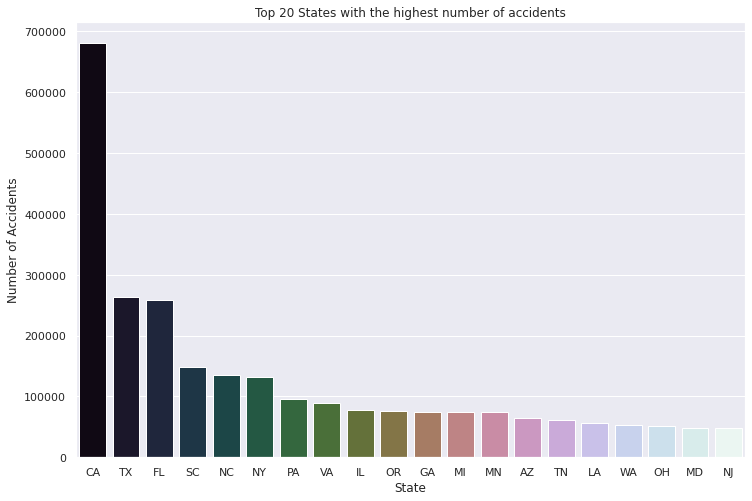

In [12]:
#viewing the top 20 states.
state_graph = by_state.iloc[0:20,:]
plt.figure(figsize=(12,8))
sns.barplot(data=state_graph, y='count',x=state_graph.index, palette='cubehelix')
plt.ylabel("Number of Accidents")
plt.title("Top 20 States with the highest number of accidents")

In [13]:
#finding the order of most accident-prone cities
stat_df = acc_train[['State' , 'City','Severity']].groupby('City').count()
stat_df = stat_df.rename(columns = {'Severity' : 'Count'}).drop(columns=['State'],inplace=False)
by_city = stat_df.sort_values(by='Count' , ascending = False)
by_city

,Count
City,
Houston,80475
Los Angeles,64674
Charlotte,62284
Dallas,53993
Austin,49097
...,...
Fort Laramie,1
Midway Park,1
Turon,1


Text(0.5, 1.0, 'Top 20 Cities with the highest number of accidents')

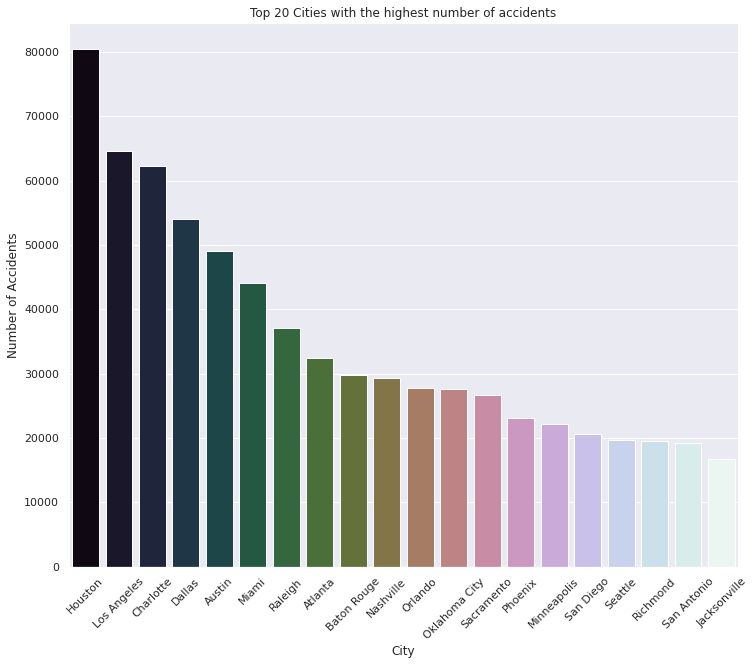

In [14]:
city_graph = by_city.iloc[0:20,:]
plt.figure(figsize=(12,10))
sns.barplot(data=city_graph, y='Count',x=city_graph.index, palette='cubehelix')
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.title("Top 20 Cities with the highest number of accidents")

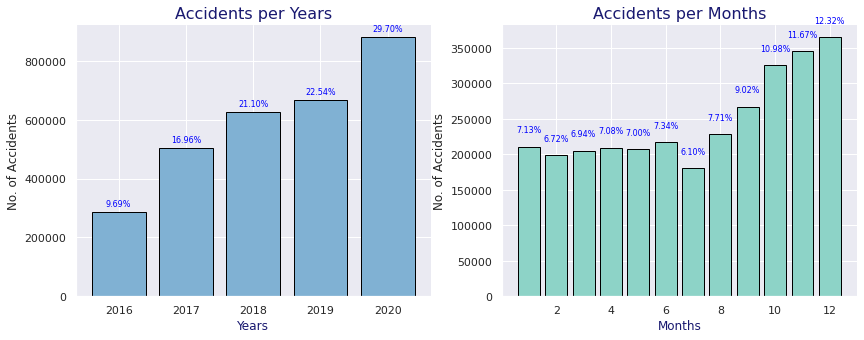

In [15]:
#plotting the frequencies of the accidents throughout different times
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(14,5))
# plot for year

light_palette = sns.color_palette(palette='Set3')

year_color_map = [light_palette[4] for _ in range(5)]


year = acc_train['year'].value_counts()
years = axis1.bar(year.index.values , year, color=year_color_map , edgecolor = 'black')
axis1.spines[('top')].set_visible(False)
axis1.spines[('right')].set_visible(False)
axis1.set_xlabel("Years", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
axis1.set_ylabel("No. of Accidents")
axis1.set_title('Accidents per Years', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

for p in axis1.patches :
    axis1.text(p.get_x() + p.get_width()/2,
            p.get_height() + 20000,
            '{:.2f}%'.format(p.get_height()/len(acc_train)*100),
            ha = "center",
            fontsize = 8, color='Blue')
    
#for month
month_color_map = [light_palette[0] for _ in range(5)]

month = acc_train['month'].value_counts()
months = axis2.bar(month.index.values , month, color=month_color_map , edgecolor = 'black')
axis2.spines[('top')].set_visible(False)
axis2.spines[('right')].set_visible(False)
axis2.set_xlabel("Months", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
axis2.set_ylabel("No. of Accidents")
axis2.set_title('Accidents per Months', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

for p in axis2.patches :
    
    axis2.text(p.get_x() + p.get_width()/2,
            p.get_height() + 20000,
            '{:.2f}%'.format(p.get_height()/len(acc_train)*100),
            ha = "center",
            fontsize = 8, color='Blue')

Text(0.5, 1.0, 'Number of accidents from 2016 to 2020')

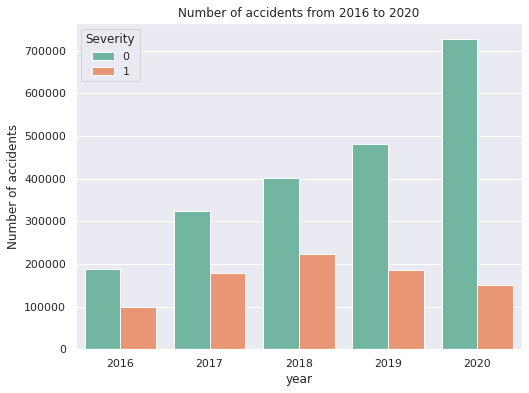

In [16]:
#checking growth in number of accidents for severity 0 and 1 
plt.figure(figsize=(8,6))
sns.countplot(data=acc_train, x='year', hue='Severity', palette='Set2')
plt.ylabel('Number of accidents')
plt.title('Number of accidents from 2016 to 2020')

Text(0.5, 1.0, 'Number of accidents every month')

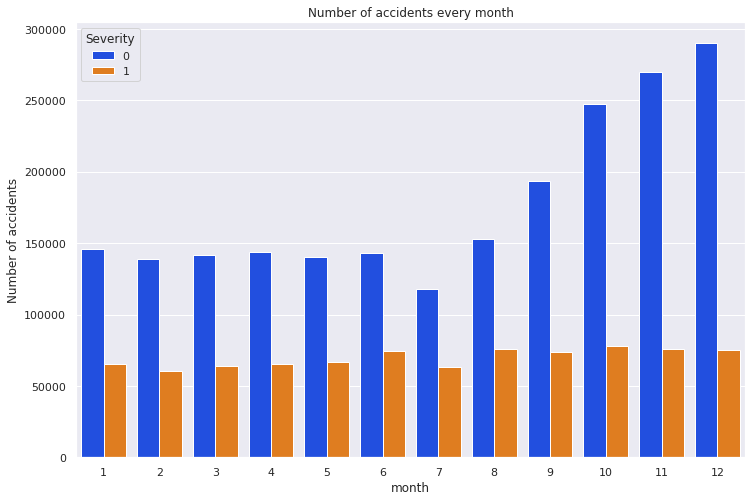

In [ ]:
#checking growth in number of accidents for severity 0 and 1 
plt.figure(figsize=(12,8))
sns.countplot(data=acc_train, x='month', hue='Severity', palette='bright')
plt.ylabel('Number of accidents')
plt.title('Number of accidents every month')

Text(0.5, 1.0, 'Number of Accidents during the hours of the day')

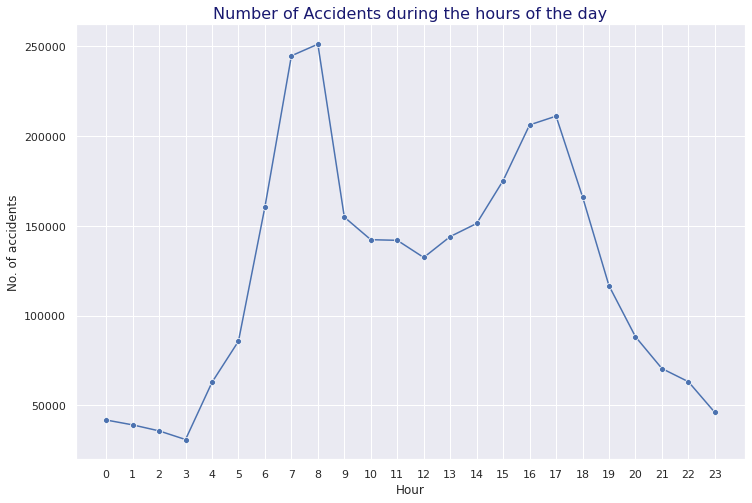

In [ ]:
#hours 
hour = acc_train['Hour'].value_counts().to_frame()
hour_labels = np.arange(24)

plt.figure(figsize=(12,8))
sns.lineplot(
    data=hour,
    x=hour.index, y="Hour", marker='o', dashes=False
)
plt.xlabel("Hour")
plt.xticks(hour_labels)
plt.ylabel("No. of accidents")
plt.title("Number of Accidents during the hours of the day",fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

Here, we see the peaks in the morning (around 8am) and another peak around 5pm. This is close to the rush hours, especially during the weekdays.

Text(0.5, 1.0, 'Number of Accidents during the days of the week')

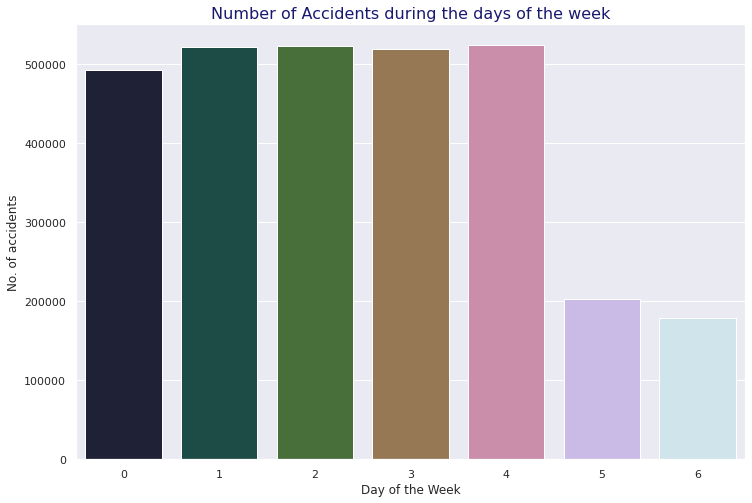

In [ ]:
#days of the week
week_day = acc_train['day_of_Week'].value_counts().to_frame()
day_labels = np.arange(7)


plt.figure(figsize=(12,8))
sns.barplot(
    data=week_day,
    x=week_day.index, y="day_of_Week", palette='cubehelix')

plt.xlabel("Day of the Week")
plt.xticks(day_labels)
plt.ylabel("No. of accidents")
plt.title("Number of Accidents during the days of the week",fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

Text(0.5, 1.0, 'Analyzing the road features')

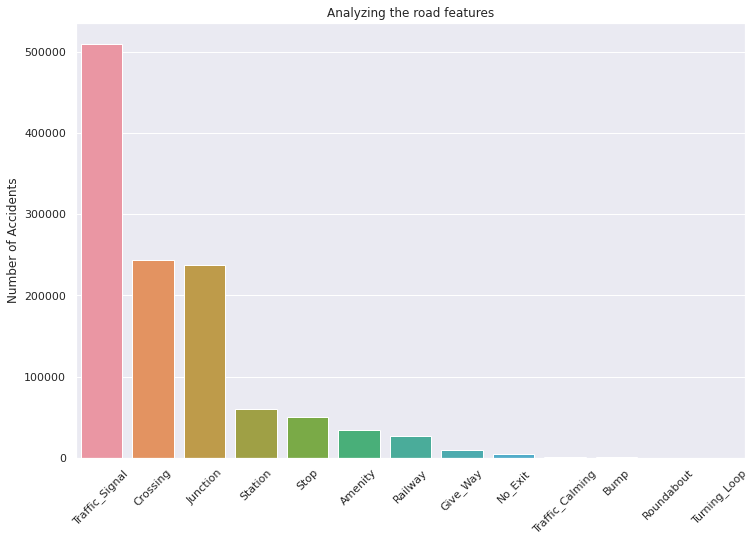

In [19]:
#since there are so many road features, but not too many to perform PCA on, I'm going to try to analyze which ones are most important
road_features = acc_train[["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]]
road_df = road_features.sum().sort_values(ascending=False).to_frame().rename(columns={0:'count'})
road_df

#plotting it on barplot
plt.figure(figsize=(12,8))
sns.barplot(data=road_df, x=road_df.index, y='count')
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.title("Analyzing the road features")

So this shows that accidents usually happened in places where there was a traffic signal, with a crossing and a junction.

In [20]:
acc_train.nunique()

Severity                   2
Start_Time           2628784
End_Time             2707188
Start_Lat             798384
Start_Lng             749983
Distance.mi.           13061
Description          1655596
Street                181216
Side                       2
City                   11766
County                  1730
State                     49
Zipcode               398476
Temperature.F.           826
Wind_Chill.F.            967
Humidity...              100
Pressure.in.            1024
Visibility.mi.            83
Wind_Direction            24
Wind_Speed.mph.          147
Precipitation.in.        250
Weather_Condition        127
Amenity                    2
Bump                       2
Crossing                   2
Give_Way                   2
Junction                   2
No_Exit                    2
Railway                    2
Roundabout                 2
Station                    2
Stop                       2
Traffic_Calming            2
Traffic_Signal             2
Turning_Loop  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

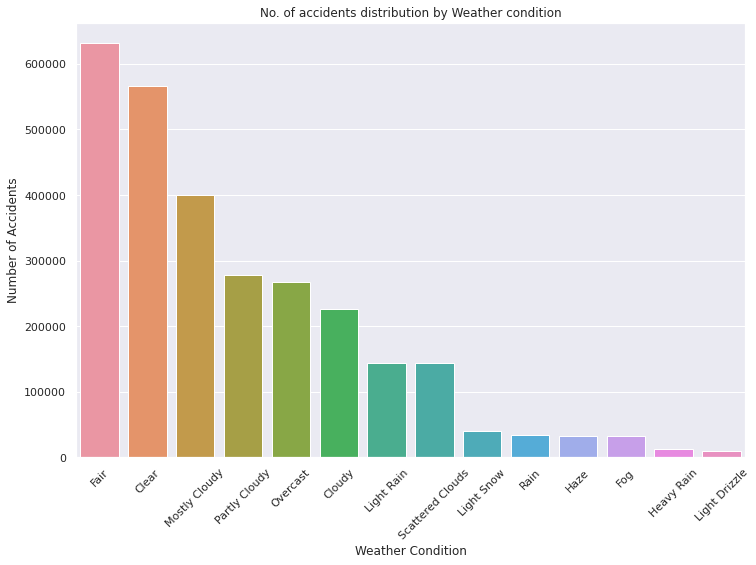

In [21]:
weather_cond_df = acc_train['Weather_Condition'].value_counts(dropna=False)[0:15].to_frame()

plt.figure(figsize=(12,8))
sns.barplot(data=weather_cond_df, x=weather_cond_df.index, y='Weather_Condition')
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("No. of accidents distribution by Weather condition")
plt.xticks(rotation=45)

In [22]:
#number of null values per column
acc_train.isna().sum()

Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
Distance.mi.               0
Description                0
Street                     0
Side                       0
City                       0
County                     0
State                      0
Zipcode                  933
Temperature.F.         63185
Wind_Chill.F.        1327951
Humidity...            67144
Pressure.in.           53742
Visibility.mi.         69279
Wind_Direction         58875
Wind_Speed.mph.       336173
Precipitation.in.    1446591
Weather_Condition      69140
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Turning_Loop  

In [23]:
#further dropping Precipitation and Wind_Chill with >1.3M missing values
acc_train.drop(columns=["Wind_Chill.F.","Precipitation.in."], inplace=True)

In [24]:
#taking a look at pressure and visibility
acc_train[["Pressure.in.", "Visibility.mi."]].describe().round(2)


,Pressure.in.,Visibility.mi.
count,2908932.00,2893395.00
mean,29.69,9.11
std,0.86,2.82
min,0.00,0.00
25%,29.64,10.00
50%,29.93,10.00
75%,30.08,10.00
max,58.04,140.00


# Data Preprocessing

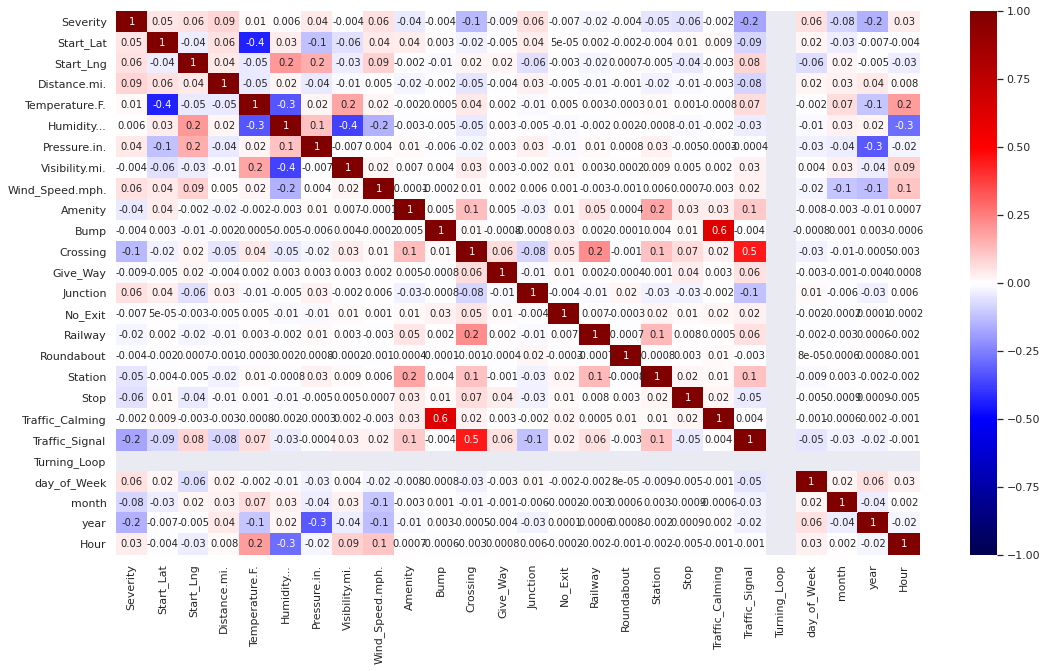

In [27]:
#correlation matrix to determine if there are any highly related columns
correlation_mtx = acc_train.corr()

plt.figure(figsize=(18, 10))
sns.heatmap(correlation_mtx, vmin=-1, vmax=1, cmap="seismic", annot = True, fmt='.1g')

Windchill and Humidity seem to be highly correlation(negative correlation).\
Turning Loop seems to have a missing correlation which turns out are all False values.\


In [ ]:
acc_train["Description"].value_counts()

A crash has occurred causing no to minimum delays. Use caution.                                             1862
At I-15 - Accident.                                                                                         1507
At I-5 - Accident.                                                                                          1344
At I-405/San Diego Fwy - Accident.                                                                          1242
At I-605 - Accident.                                                                                        1047
                                                                                                            ... 
Lane blocked due to accident on PA-130 Sandy Creek Rd Northbound from PA-380 Frankstown Rd to Verona Rd.       1
Accident on I-5 Northbound before Exit 45 Poinsettia Ln. On the median.                                        1
Accident on US-29 Tryon St Westbound at Us-29 Access Rd.                                        

In [ ]:
acc_train.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance.mi.', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Temperature.F.', 'Humidity...', 'Pressure.in.',
       'Visibility.mi.', 'Wind_Direction', 'Wind_Speed.mph.',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'day_of_Week', 'month', 'year', 'Hour'],
      dtype='object')

In [ ]:
drop_again = ["End_Time", "Turning_Loop",'Street', 'County', 'Zipcode','Start_Time','Description','Wind_Direction']
X = acc_train.drop(columns=drop_again, inplace=False)

In [ ]:
print("rows with duplicates:", len(X.index))
X.drop_duplicates(inplace=True)
print("rows after duplicates are dropped:", len(X.index))

rows with duplicates: 2962674
rows after duplicates are dropped: 2861522


In [ ]:
for i in X.columns:
    print(i)
    display(X[i].value_counts())
    display(len(X[i].value_counts().index))

Severity


0    2034106
1     827416
Name: Severity, dtype: int64

2

Start_Lat


37.808500    452
33.876290    410
33.941360    387
33.744980    375
33.781530    367
            ... 
39.872078      1
29.711370      1
35.468370      1
45.779950      1
41.520110      1
Name: Start_Lat, Length: 798384, dtype: int64

798384

Start_Lng


-118.36830    626
-118.28060    602
-111.89100    578
-111.89130    555
-121.38290    548
             ... 
-95.16788       1
-95.33212       1
-82.37925       1
-76.71649       1
-83.91406       1
Name: Start_Lng, Length: 749983, dtype: int64

749983

Distance.mi.


0.000     1849222
0.010      185463
0.020        5883
0.001        3841
0.008        2721
           ...   
6.760           1
8.498           1
9.533           1
13.388          1
12.610          1
Name: Distance.mi., Length: 13061, dtype: int64

13061

Side


R    2343334
L     518188
Name: Side, dtype: int64

2

City


Houston           79236
Los Angeles       62533
Charlotte         60699
Dallas            52992
Austin            48369
                  ...  
Counselor             1
Charleston AFB        1
Ventnor City          1
Tiro                  1
Wallington            1
Name: City, Length: 11766, dtype: int64

11766

State


CA    655363
TX    259189
FL    243043
SC    145433
NC    131731
NY    126628
PA     90435
VA     84366
IL     77119
GA     73426
MI     73003
OR     72330
MN     70913
AZ     63339
TN     60449
LA     54250
WA     51463
OH     50487
NJ     46282
MD     45376
OK     45259
UT     39478
AL     39082
CO     36779
MA     30298
MO     27274
IN     26317
CT     21626
NE     17542
KY     17059
WI     14953
IA      9377
RI      8865
NV      8316
KS      6620
NH      5963
MS      5526
DE      4613
NM      4422
DC      4181
AR      3210
ID      2622
WV      2405
MT      2149
ME      1660
VT       502
WY       370
ND       288
SD       141
Name: State, dtype: int64

49

Temperature.F.


 68.0     62468
 77.0     61222
 59.0     58493
 73.0     57054
 63.0     53913
          ...  
 113.4        1
 111.7        1
 143.6        1
 167.0        1
-21.1         1
Name: Temperature.F., Length: 826, dtype: int64

826

Humidity...


100.0    115584
93.0     111138
90.0      65492
87.0      65062
89.0      54435
          ...  
5.0        1581
4.0         868
3.0         217
2.0          67
1.0           9
Name: Humidity..., Length: 100, dtype: int64

100

Pressure.in.


29.96    54143
30.01    54001
29.99    53414
29.94    51922
30.04    51432
         ...  
20.30        1
20.05        1
19.89        1
20.07        1
20.10        1
Name: Pressure.in., Length: 1024, dtype: int64

1024

Visibility.mi.


10.0    2225748
7.0       87391
9.0       75023
8.0       59906
5.0       56463
         ...   
58.0          1
6.2           1
63.0          1
67.0          1
43.0          1
Name: Visibility.mi., Length: 83, dtype: int64

83

Wind_Speed.mph.


0.0      245610
4.6      151218
5.8      150100
3.5      141735
6.9      140161
          ...  
211.0         1
214.0         1
105.0         1
232.0         1
77.1          1
Name: Wind_Speed.mph., Length: 147, dtype: int64

147

Weather_Condition


Fair                   587613
Clear                  562916
Mostly Cloudy          387759
Partly Cloudy          270262
Overcast               265814
                        ...  
Blowing Sand                1
Hail                        1
Light Fog                   1
Partial Fog / Windy         1
Light Sleet / Windy         1
Name: Weather_Condition, Length: 127, dtype: int64

127

Amenity


False    2827989
True       33533
Name: Amenity, dtype: int64

2

Bump


False    2860952
True         570
Name: Bump, dtype: int64

2

Crossing


False    2625408
True      236114
Name: Crossing, dtype: int64

2

Give_Way


False    2852483
True        9039
Name: Give_Way, dtype: int64

2

Junction


False    2633717
True      227805
Name: Junction, dtype: int64

2

No_Exit


False    2857543
True        3979
Name: No_Exit, dtype: int64

2

Railway


False    2835415
True       26107
Name: Railway, dtype: int64

2

Roundabout


False    2861350
True         172
Name: Roundabout, dtype: int64

2

Station


False    2804030
True       57492
Name: Station, dtype: int64

2

Stop


False    2812221
True       49301
Name: Stop, dtype: int64

2

Traffic_Calming


False    2860058
True        1464
Name: Traffic_Calming, dtype: int64

2

Traffic_Signal


False    2365989
True      495533
Name: Traffic_Signal, dtype: int64

2

Sunrise_Sunset


Day      1998429
Night     863093
Name: Sunrise_Sunset, dtype: int64

2

day_of_Week


4    508242
2    506441
1    505395
3    502531
0    476990
5    192008
6    169915
Name: day_of_Week, dtype: int64

7

month


12    333503
11    323433
10    310946
9     258921
8     227136
6     213374
1     209472
4     203471
5     202654
3     201599
2     197375
7     179638
Name: month, dtype: int64

12

year


2020    792602
2019    662625
2018    621325
2017    499246
2016    285724
Name: year, dtype: int64

5

Hour


8     247876
7     241209
17    205814
16    200750
15    169639
18    161249
6     157296
9     152426
14    145228
10    140042
11    139058
13    137093
12    127256
19    112616
20     84175
5      82998
21     66185
4      60068
22     58642
23     41257
0      37168
1      34022
2      31633
3      27822
Name: Hour, dtype: int64

24

## Don't run anything under this until the modelling section

In [ ]:
list_values = ['City','State','Weather_Condition','day_of_Week','month','year','Hour']
num_vals = [25, 25,15,6,12,5,24]

In [ ]:
for i in range(len(list_values)):
    col_name = list_values[i]
    num_cols = num_vals[i]
    col_df = pd.get_dummies(X[col_name],prefix=col_name, prefix_sep='_')
    col_df = col_df.iloc[:,0:num_cols]
    X = X.join(col_df)

NameError: ignored

In [ ]:
bool_vals = ['Amenity','Bump','Crossing','Give_Way',
               'Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal',
             'Sunrise_Sunset',]

In [ ]:
X['Weather_Condition'].value_counts().to_frame().head(30)

,Weather_Condition
Fair,587613
Clear,562916
Mostly Cloudy,387759
Partly Cloudy,270262
Overcast,265814
Cloudy,211467
Scattered Clouds,142512
Light Rain,139644
Light Snow,39037
Rain,32918
